<a href="https://colab.research.google.com/github/mikislin/summer20-Intro-python/blob/master/06_Matplotlib_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Matplotlib**

Matplotlib is a library for producing publication-quality figures and was designed from the beginning to serve two purposes:

- allow for interactive, cross-platform control of figures and plots
- make it easy to produce static raster or vector graphics files without the need for any GUIs.

Furthermore, it gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

The (https://matplotlib.org) project website is the primary online resource for the library's documentation.


In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

Quick note on "backends" and Jupyter notebooks
Matplotlib has multiple "backends" that handle converting Matplotlib's in-memory representation of your plot into the colorful output you can look at. This is done either by writing files (e.g., png, svg, pdf) that you can use an external tool to look at or by embedding into your GUI toolkit of choice

In [ ]:
# check what backend Matplotlib is using 

import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.2.1
module://ipykernel.pylab.backend_inline


One of the great features of the Jupyter Notebook is the ability to have your code, outputs, and graphics in a single document. But plots do not render in the notebook by default. To turn on inline plot rendering, we have to use a so-called **Magic Command**, which is a special Jupyter command preceded by a %.

Two commonly used Matplotlib magic commands are:


1.   %matplotlib notebook - creates interactive plots. This is what we're going to use today. Interactive features depend on the kernel running in the background, which means they disappear without the kernel. This feature is somewhat new, so still has occasional bugs. 
NB! - does not work in Colab

2.   %matplotlib inline - creates static (non-interactive) plots. This still remains the most common way to generate plots.


In [ ]:
%matplotlib inline

### **Anatomy of a "Plot"**

The Figure is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and Figures can contain multiple Axes.

Most plotting ocurs on an Axes. The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it. Usually we'll set up an Axes with a call to subplot (which places Axes on a regular grid), so in most cases, Axes and Subplot are synonymous.

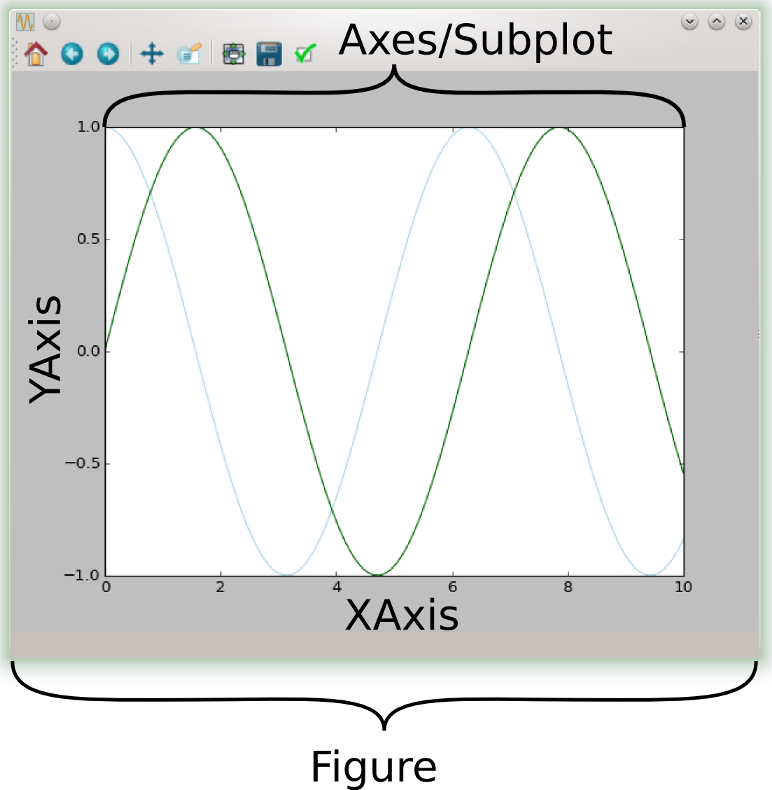


**Figures**

let's create a figure of manually defined size

Add an argument figsize to your `plt.figure()` function of the pyplot module; You just have to specify a tuple with the width and hight of your figure in inches, just like this `plt.figure(figsize=(5,5))`, for it to work

In [ ]:
# red background to see where the figure is
fig = plt.figure(figsize=(10,10),facecolor=(1, 0, 0, .1))  

<Figure size 720x720 with 0 Axes>

[(-2.0, 8.0),
 Text(0, 0.5, 'Y-Axis'),
 (0.5, 4.5),
 Text(0.5, 0, 'X-Axis'),
 Text(0.5, 1.0, 'An Example Axes')]

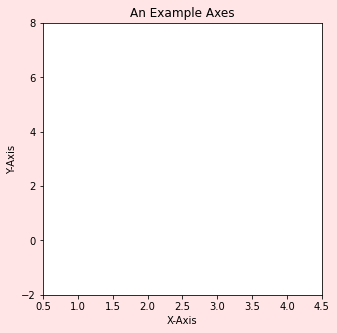

In [ ]:
# add an Axes to it
fig = plt.figure(figsize=(5,5),facecolor=(1, 0, 0, .1))  
ax = fig.add_subplot(111) 
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()

 ### **Simple plot**


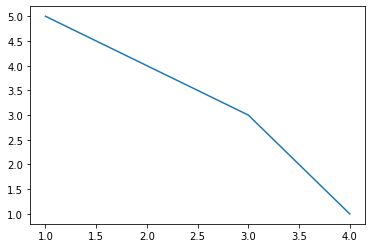

In [ ]:
fig, ax = plt.subplots() 
ax.plot([1, 2, 3, 4], [5, 4, 3, 1])
plt.show()

Many other plotting libraries or languages do not require you to explicitly create an axes.

In fact, you can do the same in Matplotlib: for each Axes graphing method, there is a corresponding function in the matplotlib.pyplot module that performs that plot on the "current" axes, creating that axes (and its parent figure) if they don't exist yet. 

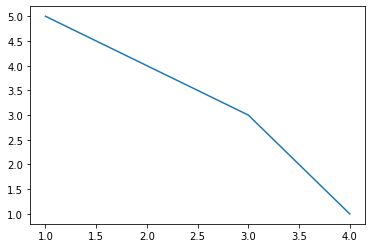

In [ ]:
plt.plot([1, 2, 3, 4], [5, 4, 3, 1])

There are essentially two ways to use Matplotlib:

1.   Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
2.   Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.


(0.5, 4.5)

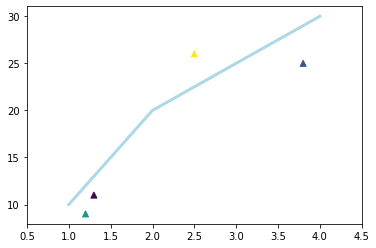

In [ ]:
# OO-style
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([1.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

(0.5, 4.5)

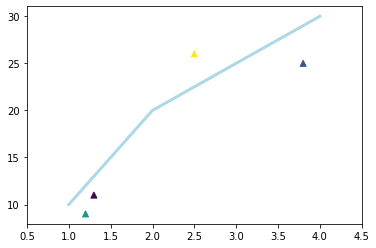

In [ ]:
# pyplot-style

plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([1.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], c=[1, 2, 3, 5], marker='^')
plt.xlim(0.5, 4.5)
plt.show()

"Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the Axes and/or Figure object to operate upon.

###**Multiple Axes**

A given figure can have more than one axis. The subplot command generates a single axis by default. But number of axis can be specified

In [ ]:
#make a time array
t = np.arange(0, 10, 0.1)

Text(0, 0.5, 'Amplitude')

Text(0, 0.5, 'Amplitude')

Text(0.5, 0, 'Time')

Text(0.5, 0.98, 'This is the figure title')

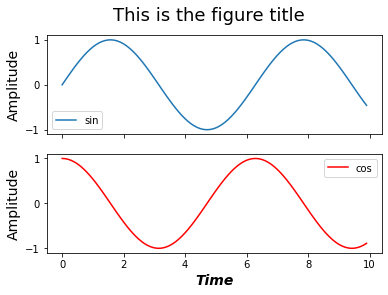

In [ ]:
# Create figure and axes objects. Make them share the x-axis
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

axes[0].plot(t, np.sin(t), label='sin')
axes[1].plot(t, np.cos(t), label='cos', color='red')

# loop over the `axes` array to set properties in every subplot 
for ax in axes:
    ax.legend(loc='best')
    ax.set_ylabel('Amplitude', fontsize=14)

# access individual axes to set the properties
axes[-1].set_xlabel('Time', fontsize=14, weight='bold', style='italic')

# edit attributes of the entire figure, such as the title
fig.suptitle('This is the figure title', fontsize=18)

The difference between `fig.add_axes()` and `fig.add_subplot()` doesn’t lie in the result: they both return an Axes object. However, they do differ in the mechanism that is used to add the axes: you pass a list to `add_axes()` which is the lower left point, the width and the height. This means that the axes object is positioned in absolute coordinates.

In contrast, the `add_subplot()` function doesn’t provide the option to put the axes at a certain position: it does, however, allow the axes to be situated according to a subplot grid, as you have seen in the section above.

In most cases, you’ll use `add_subplot() `to create axes; Only in cases where the positioning matters, you’ll resort to `add_axes()`. Alternatively, you can also use `subplots()` if you want to get one or more subplots at the same time.

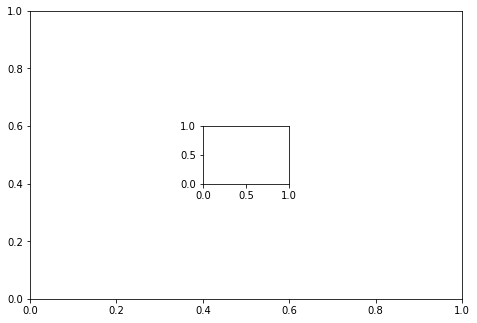

In [ ]:
# Create a figure object and put two axes on it, ax1 and ax2. 
fig = plt.figure()

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.4,0.4,0.2,0.2])

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 0, 'x')

Text(21.200000000000003, 0.5, 'y')

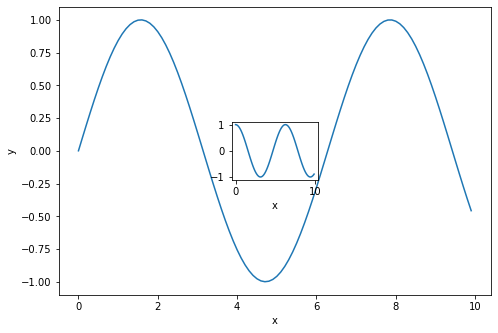

In [ ]:
# plot (x,y) on both axes
fig = plt.figure()

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.4,0.4,0.2,0.2])
ax1.plot(t, np.sin(t),)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(t, np.cos(t),)
ax2.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

**Twin axes**

To show two different x or y axes use `twin()`

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Density (cgs)')

Text(0, 0.5, 'Temperature (K)')

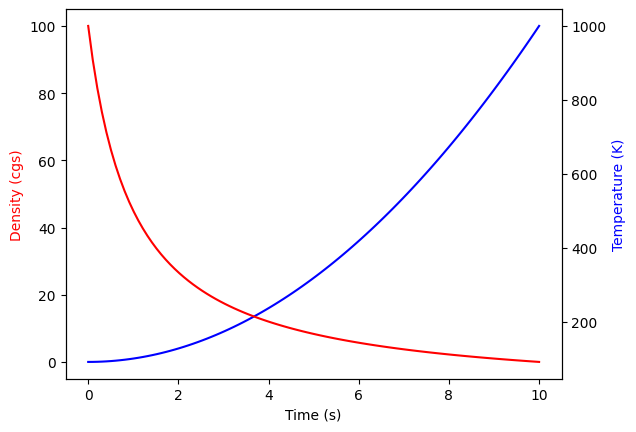

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()
t = np.linspace(0., 10., 100)
ax1.plot(t, t ** 2, 'b-')
ax2.plot(t, 1000 / (t + 1), 'r-')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Density (cgs)', color='red')
ax2.set_ylabel('Temperature (K)', color='blue')


**rc parameters**

matplotlib allows users to specify default properties via rc parameters. 

In [ ]:
plt.rc('xtick', color='r', labelsize='medium', direction='out')
plt.rc('xtick.major', size=4, pad=4)
plt.rc('xtick.minor', size=2, pad=4)

If you need to reset the parameters to their default values, use: `plt.rcdefaults()`

In [ ]:
plt.rcdefaults()

###**Artists, Patches, and Lines**

Virtually all objects in Matplotlib are artists, which are objects that have visual attributes that can be set. There are two important kinds of artists: lines, and patches.

It is actually very easy to add your own custom lines or patches (e.g. a circle, a square, etc.) to a plot. In the case of a patch, import the patch class you need:

`from matplotlib.patches import Circle`

In [ ]:
from matplotlib.patches import Circle

c = Circle((0.5, 0.5), radius=0.2,
            edgecolor='red', facecolor='blue', alpha=0.3)

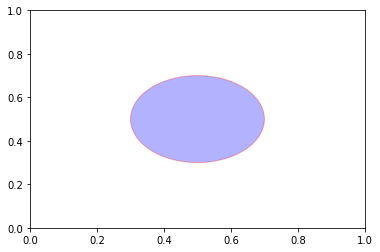

In [ ]:
fig,ax = plt.subplots()
ax.add_patch(c)

###**Overview of Plotting Functions**

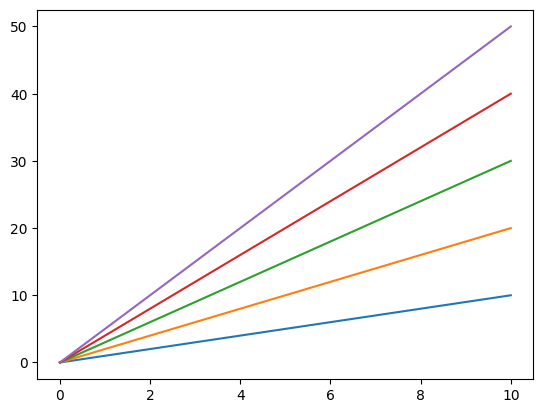

In [ ]:
# plot lines, colors will be determined by the axes' color_cycle

fig, axes = plt.subplots()
for i in range(1, 6):
    axes.plot(t, i * t)

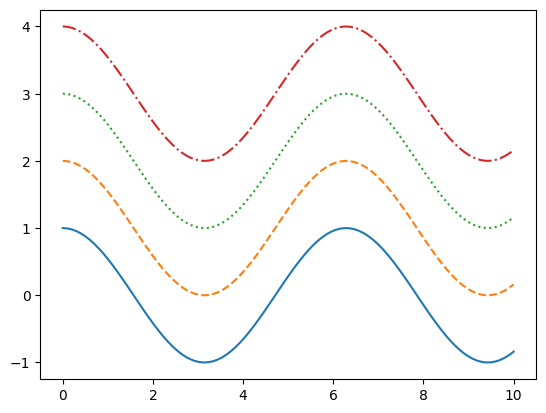

In [ ]:
# plot lines with different linestyles
fig, axes = plt.subplots()
for i, ls in enumerate(['-', '--', ':', '-.']):
    axes.plot(t, np.cos(t) + i, linestyle=ls)


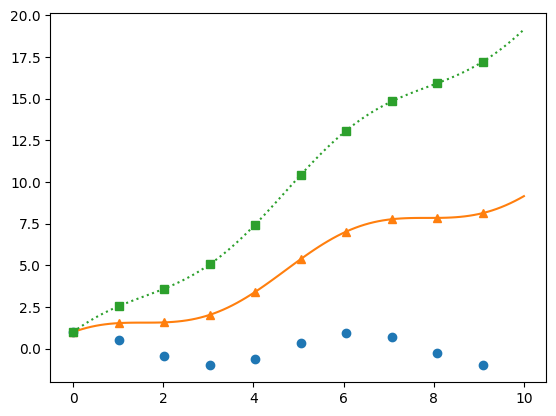

In [ ]:
# Using linestyles and markers, with zip()
fig, axes = plt.subplots()
for i, (ls, mk) in enumerate(zip(['', '-', ':'], ['o', '^', 's'])):
    axes.plot(t, np.cos(t) + i*t, linestyle=ls, marker=mk, markevery=10)

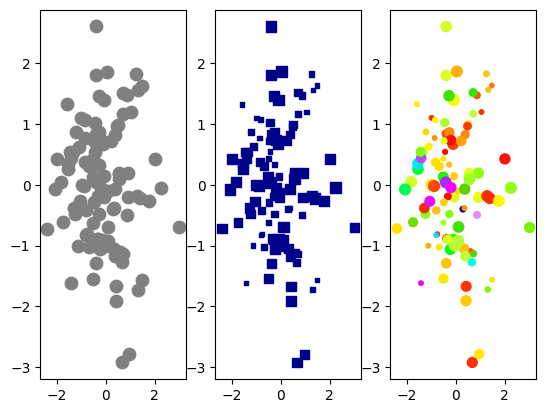

In [ ]:
# scatter plot 
np.random.seed(1874)
x, y, z = np.random.normal(0, 1, (3, 100))
t = np.arctan2(y, x)
size = 50 * np.cos(2 * t)**2 + 10

fig, axes = plt.subplots(1,3)
axes[0].scatter(x, y, marker='o', facecolor='gray', s=80)

axes[1].scatter(x, y, s=size, marker='s', color='darkblue')

axes[2].scatter(x, y, c=z, s=size, cmap='gist_ncar')


<BarContainer object of 6 artists>

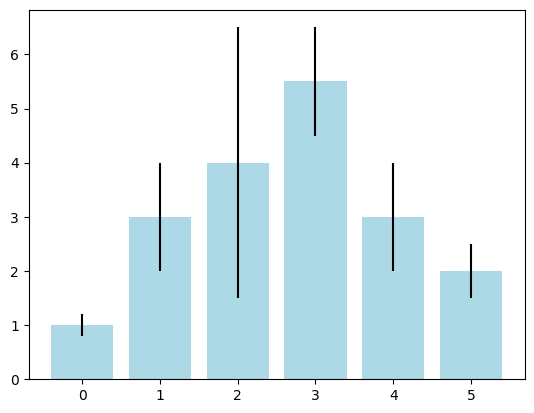

In [ ]:
# basic bar graph

y = [1, 3, 4, 5.5, 3, 2]
err = [0.2, 1, 2.5, 1, 1, 0.5]
x = np.arange(len(y))
plt.bar(x, y, yerr=err, color='lightblue', ecolor='black')
plt.margins(0.05)
plt.show()

<BarContainer object of 8 artists>

<BarContainer object of 8 artists>

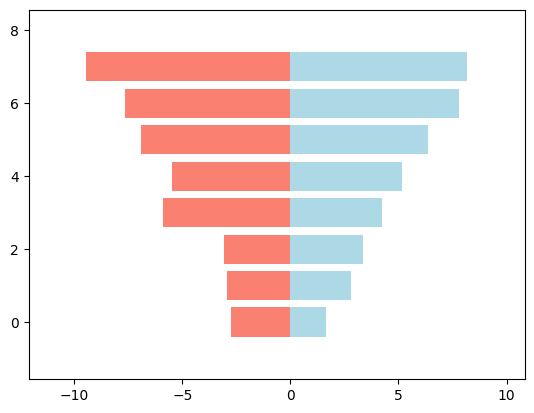

In [ ]:
# horizontal bar plot
y = np.arange(8)
x1 = y + np.random.random(8) + 1
x2 = y + 3 * np.random.random(8) + 1
plt.barh(y, x1, color='lightblue')
plt.barh(y, -x2, color='salmon')
plt.margins(0.15)

<BarContainer object of 10 artists>

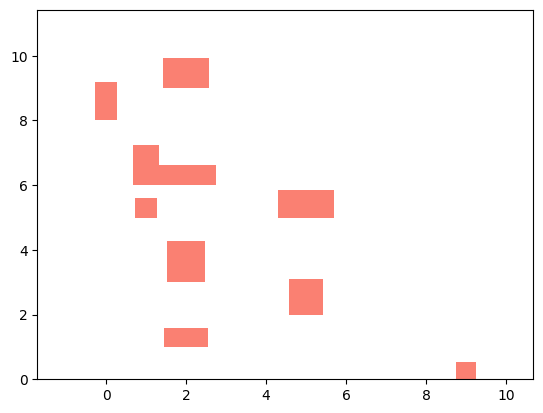

In [ ]:
# plot rectangles

num = 10
left = np.random.randint(0, 10, num)
bottom = np.random.randint(0, 10, num)
width = np.random.random(num) + 0.5
height = np.random.random(num) + 0.5
plt.bar(left, height, width, bottom, color='salmon')
plt.margins(0.15)

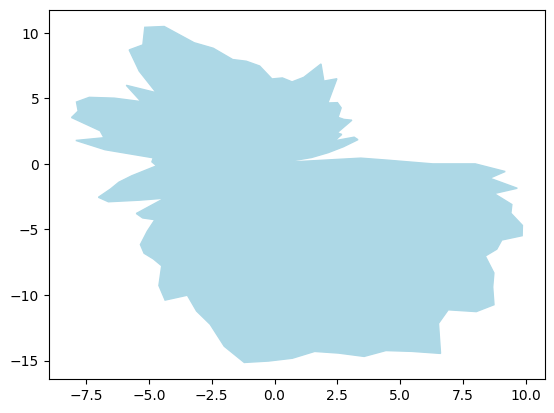

In [ ]:
# Use fill when you want a simple filled polygon between vertices
def fill_data():
    t = np.linspace(0, 2*np.pi, 100)
    r = np.random.normal(0, 1, 100).cumsum()
    r -= r.min()
    return r * np.cos(t), r * np.sin(t)
x, y = fill_data()
plt.fill(x, y, color='lightblue')

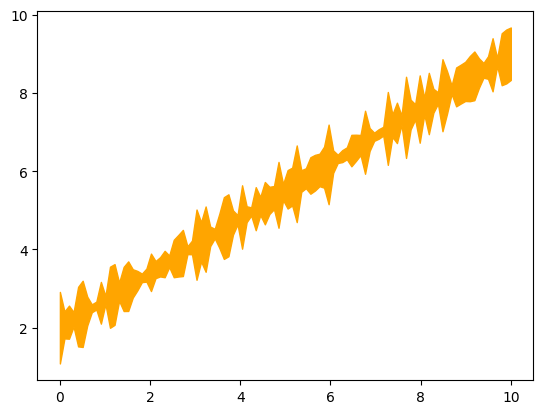

In [ ]:
# The most basic (and common) use of fill_between
x = np.linspace(0, 10, 100)

err = np.random.rand(x.size)**2 + 0.1
y = 0.7 * x + 2
plt.fill_between(x, y + err, y - err, color='orange')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  if __name__ == '__main__':


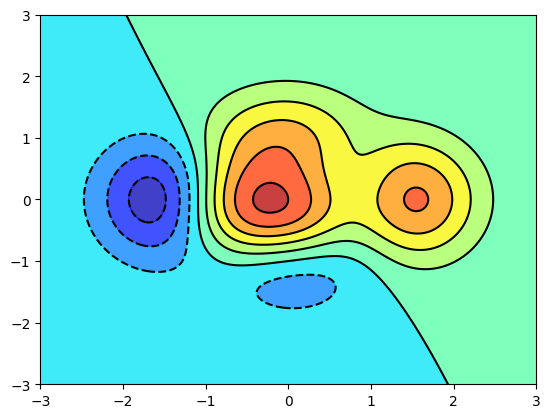

In [ ]:
# Contour Plots
def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.show()

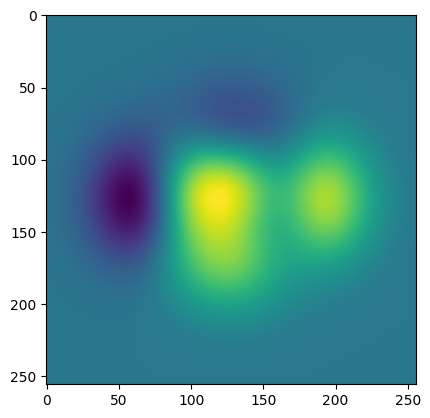

In [ ]:
# imshow
plt.imshow(f(X,Y))
plt.show()

([<matplotlib.patches.Wedge at 0x7efd6faf96a0>,
 [Text(1.064872866782751, 0.2757639889287322, ''),
  Text(0.9257628455917496, 0.5941070221112242, ''),
  Text(0.6965363682289751, 0.8513736475451832, ''),
  Text(0.24409532805386888, 1.072575158589026, ''),
  Text(-0.1509215728580331, 1.0895974847832834, ''),
  Text(-0.32009102881804946, 1.0523980868807217, ''),
  Text(-0.4521589153108668, 1.002772314787809, ''),
  Text(-0.746839745715656, 0.8076078220394936, ''),
  Text(-0.9039122479651773, 0.6268513763074466, ''),
  Text(-1.038196086480664, 0.3635228823832601, ''),
  Text(-1.0998712730690556, -0.01682803248911567, ''),
  Text(-0.9960394887671669, -0.4668033170580957, ''),
  Text(-0.6798978426507641, -0.8647189853118971, ''),
  Text(-0.5165784950839264, -0.9711573808692523, ''),
  Text(-0.416506631132734, -1.0180973559647726, ''),
  Text(-0.10330186461974646, -1.0951386783262125, ''),
  Text(0.35182497664409484, -1.0422183964070977, ''),
  Text(0.6328040343859278, -0.8997549966879281, ''

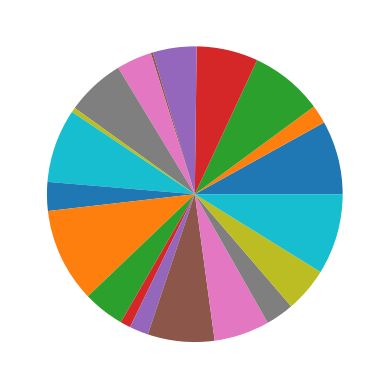

In [ ]:
# Pie Charts
n = 20
Z = np.random.uniform(0,1,n)
plt.pie(Z)
plt.show()

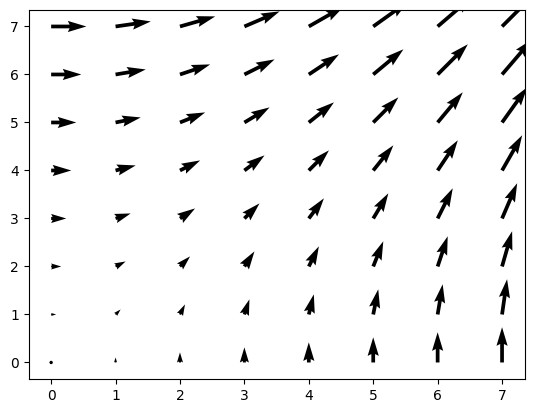

In [ ]:
# Quiver Plots

n = 8
X,Y = np.mgrid[0:n,0:n]
plt.quiver(X,Y)
plt.show()

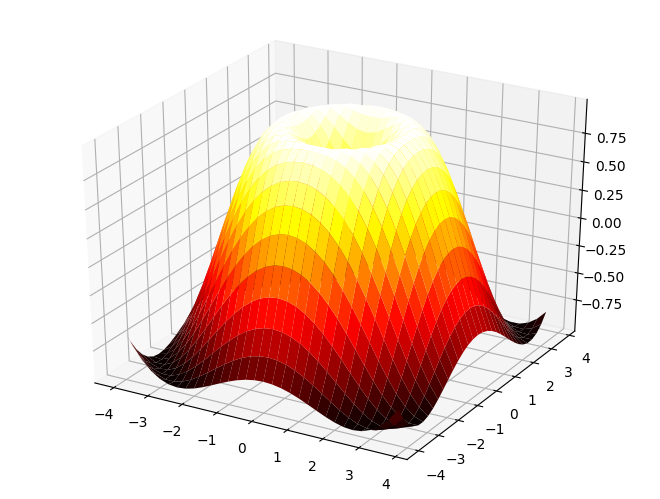

In [ ]:
# 3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

plt.show()

**statistical plots**
you may find that a specalized statistical plotting
package such as `Seaborn` (which uses matplotlib behind-the-scenes) is a better
fit to your needs

In [ ]:
# generate data
means = [0, -1, 2.5, 4.3, -3.6]
sigmas = [1.2, 5, 3, 1.5, 2]
nums = [150, 1000, 100, 200, 500]
dists = [np.random.normal(*args) for args in zip(means, sigmas, nums)]

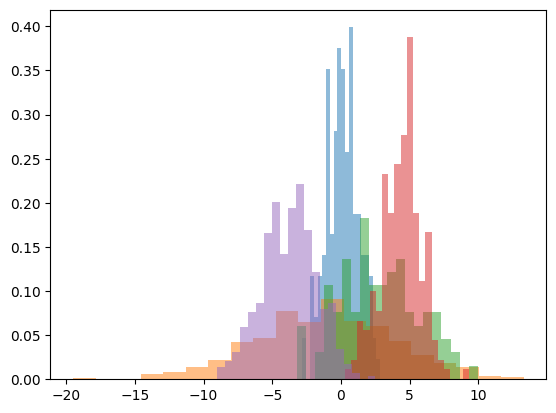

In [ ]:
# histogram
fig, ax = plt.subplots()

for dist in dists:
  h=ax.hist(dist, bins=20, density=True, edgecolor='none', alpha=0.5)
  h=ax.margins(y=0.05)
  h=ax.set_ylim(bottom=0)
plt.show()

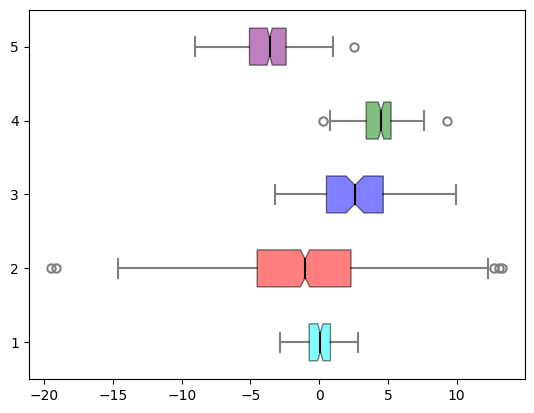

In [ ]:
# boxplot
fig, ax = plt.subplots()
result = ax.boxplot(dists, patch_artist=True, notch=True, vert=False)

for box, color in zip(result['boxes'], colors):
  h=box.set(facecolor=color, alpha=0.5)
for item in ['whiskers', 'caps', 'medians']:
  h=plt.setp(result[item], color='gray', linewidth=1.5)
  h=plt.setp(result['fliers'], markeredgecolor='gray', markeredgewidth=1.5)
  h=plt.setp(result['medians'], color='black')
  h=ax.margins(0.05)
  
plt.show()

[None, None]

[None, None]

[None, None]

[None, None]

[None, None]

[None, None]

[None]

[None, None]

[None]

[None, None]

[None]

[None, None]

[None]

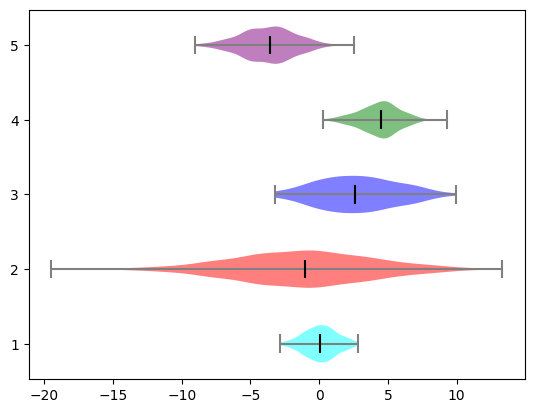

In [ ]:
# violinplot
fig, ax = plt.subplots()
result = ax.violinplot(dists, vert=False, showmedians=True)
for body, color in zip(result['bodies'], colors):
  body.set(facecolor=color, alpha=0.5)
for item in ['cbars', 'cmaxes', 'cmins', 'cmedians']:
  plt.setp(result[item], edgecolor='gray', linewidth=1.5)
  plt.setp(result['cmedians'], edgecolor='black')

plt.show()